# Feature_Selection_Techniques_Breast_Cancer_Data

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
df=pd.read_csv('BRCA.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [274]:
df.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Age,334.0,58.886228,12.961212,29.00000,35.330000,40.000000,43.000000,49.000000,58.000000,68.000000,77.700000,82.350000,88.000000,90.0000
Protein1,334.0,-0.029991,0.563588,-2.34090,-1.618252,-0.938104,-0.717118,-0.358888,0.006129,0.343598,0.656522,0.783550,1.056774,1.5936
Protein2,334.0,0.946896,0.911637,-0.97873,-0.871628,-0.639689,-0.471833,0.362173,0.992805,1.627900,2.055690,2.300390,2.695139,3.4022
Protein3,334.0,-0.090204,0.585175,-1.62740,-1.157717,-0.860931,-0.747390,-0.513748,-0.173180,0.278353,0.682048,1.036355,1.607835,2.1934
Protein4,334.0,0.009819,0.629055,-2.02550,-1.689072,-1.153960,-0.822640,-0.377090,0.041768,0.425630,0.786222,0.948483,1.184569,1.6299


In [275]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [276]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [277]:
df.dropna(axis=0,inplace=True)

In [278]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

## Droping Patient id 

In [279]:
df.drop(['Patient_ID'],axis=1,inplace=True)

## Creating seperate dataframe for numerical variables

In [280]:
df_num=df.select_dtypes('number')
df_num.head()

,Age,Protein1,Protein2,Protein3,Protein4
0,36.0,0.080353,0.42638,0.54715,0.273680
1,43.0,-0.420320,0.57807,0.61447,-0.031505
2,69.0,0.213980,1.31140,-0.32747,-0.234260
3,56.0,0.345090,-0.21147,-0.19304,0.124270
4,56.0,0.221550,1.90680,0.52045,-0.311990


## Distribution plots of numerical variables

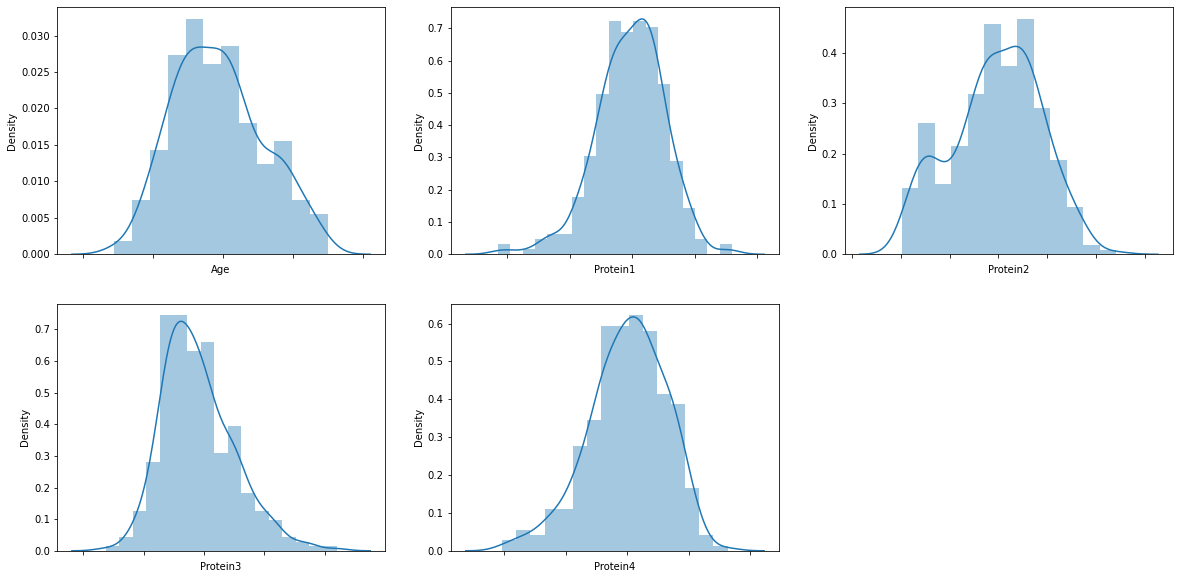

In [281]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,10))
for col,var in enumerate (df_num.columns,1):
    plt.subplot(2,3,col)
    ax=sns.distplot(df_num[var])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Creating seperate dataframe for categorical variables.

In [282]:
df_cat=df.select_dtypes('object')
df_cat['Patient_Status']=np.where(df_cat['Patient_Status']=='Alive',1,0)
df_cat.head()

,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,FEMALE,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,1
1,FEMALE,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,0
2,FEMALE,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,1
3,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,1
4,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,0


## Replacing 1/0 for target variable

In [283]:
y=df_cat[['Patient_Status']]
y.head()

,Patient_Status
0,1
1,0
2,1
3,1
4,0


## Feature selection techniques - Numerical Features

### Varience Threshold method

***
- Numerical feature with zero variance doesn't contribute in predicting the event.   
- So elimination of those features could be done using varience Threshold method.
***

In [288]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0)
selector.fit_transform(df_num)
cols=selector.get_support(indices=True)
df_num1=df_num.iloc[:,cols]
df_num1.head()

,Age,Protein1,Protein2,Protein3,Protein4
0,36.0,0.080353,0.42638,0.54715,0.273680
1,43.0,-0.420320,0.57807,0.61447,-0.031505
2,69.0,0.213980,1.31140,-0.32747,-0.234260
3,56.0,0.345090,-0.21147,-0.19304,0.124270
4,56.0,0.221550,1.90680,0.52045,-0.311990


All columns are retained as there are no features having varience zero

### Bi-variate analysis of numerical features (with feature discretization)

***
- Numerical feature are descretized and is segregated into the bins.   
- And features are analysed based on how bins are varing with respect to target variable.   
- If the slope is good, then that feature have more impact in descreminationg event and non events.
***

In [289]:
from sklearn.preprocessing import KBinsDiscretizer
descrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
df_num2=descrete.fit_transform(df_num1)
df_num2=pd.DataFrame(df_num2,columns=df_num1.columns,index=df_num1.index).add_suffix('_Rank')

In [290]:
df_num2.head()

,Age_Rank,Protein1_Rank,Protein2_Rank,Protein3_Rank,Protein4_Rank
0,0.0,5.0,2.0,8.0,6.0
1,1.0,2.0,3.0,8.0,4.0
2,7.0,6.0,6.0,4.0,3.0
3,4.0,7.0,1.0,5.0,5.0
4,4.0,6.0,8.0,8.0,2.0


In [291]:
df_num2=pd.concat([df_num2,y],axis=1)

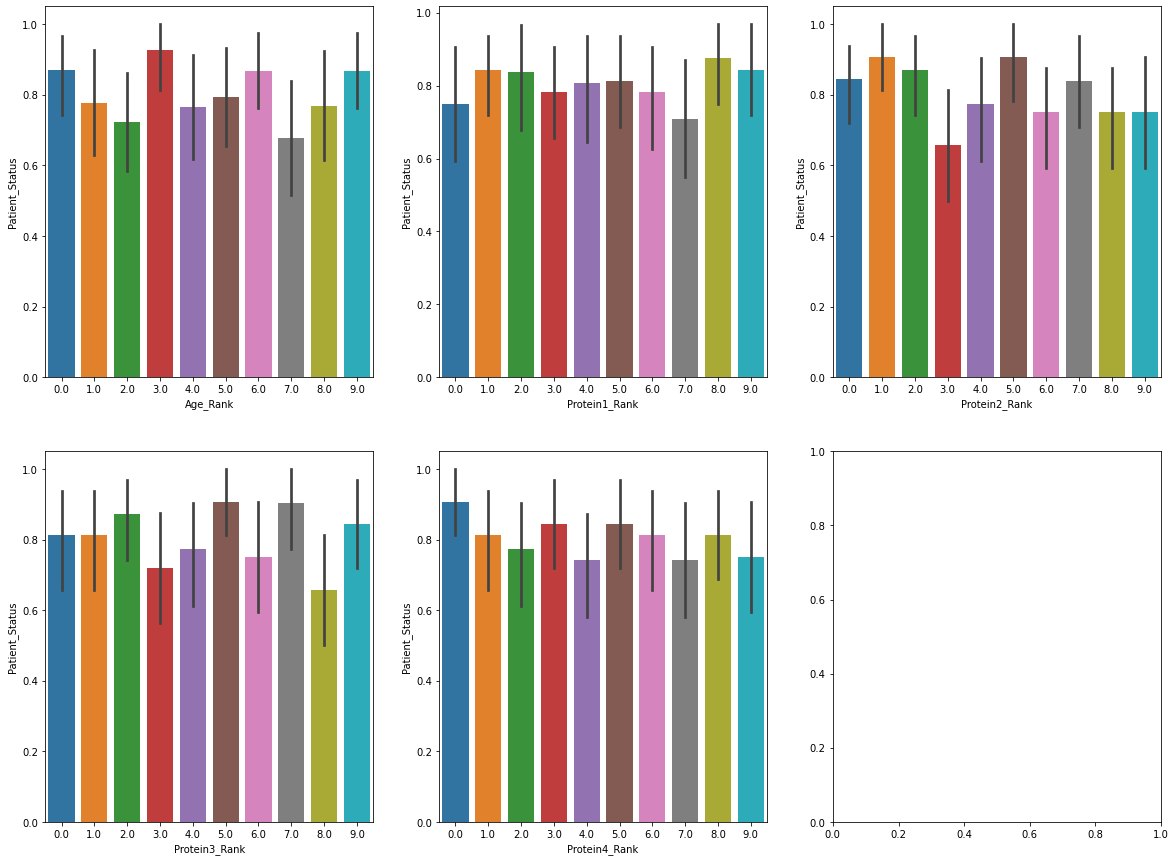

In [292]:
plt.figure(figsize=(20,15))
for i,var in enumerate(df_num2.columns,1):
    plt.subplot(2,3,i)
    if var!='Patient_Status':
        ax=sns.barplot(x=var,y='Patient_Status',data=df_num2)

***
All numerical variables shows decent variation and hence they ability of predicting event and non event will be more by considering these features 
***

## Feature selection techniques - Categorical Features

### Bi-variate analysis for categorical feature

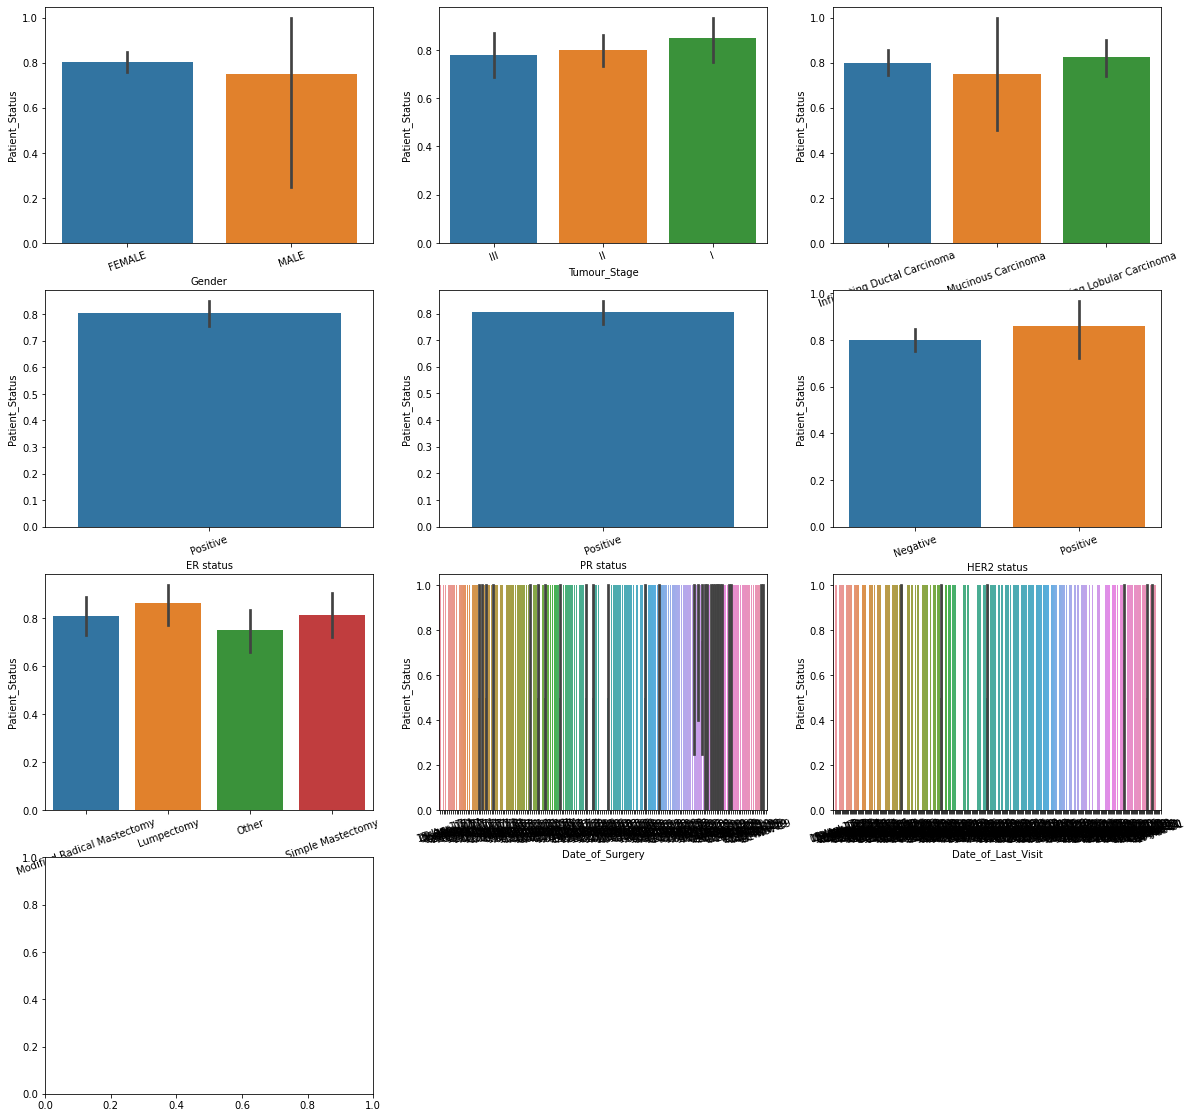

In [295]:
plt.figure(figsize=(20,20))
for i,col in enumerate(df_cat.columns,1):
    plt.subplot(4,3,i)
    if col!='Patient_Status':
        ax=sns.barplot(data=df_cat,x=col,y='Patient_Status')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

### Value count of categorical features.

In [296]:
for var in df_cat.columns:
    print(df_cat[var].value_counts())
    print('---------------------------------------')

FEMALE    313
MALE        4
Name: Gender, dtype: int64
---------------------------------------
II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64
---------------------------------------
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64
---------------------------------------
Positive    317
Name: ER status, dtype: int64
---------------------------------------
Positive    317
Name: PR status, dtype: int64
---------------------------------------
Negative    288
Positive     29
Name: HER2 status, dtype: int64
---------------------------------------
Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64
---------------------------------------
06-Dec-18    5
06-Nov-18    5
17-Oct-18    4
26-Nov-18    4
16-Dec-18    4
            ..
25-Jun-17    1
18-Sep-17    1
12-Oct-17 

***
From above analysis we can infer that,
- Gender feature can be dropped as there is very low varience.
- Tumor_stage, Histology can be dropped as there is no significance difference between the feature value counts or could use some other feature selection techniques to decide.
- ER_Status, PR_status can be dropped as there is zero varience.
- A strong value of slope will indicate the ability of descrmination between event and non event.
- Dates feature could be dropped or could be converted into meaningful feature out of it.
***

In [299]:
#droping date features.
df_cat.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [301]:
#droping Gender and Patient_Status
df_cat.drop(['Gender','Patient_Status','ER status','PR status'],axis=1,inplace=True)

In [302]:
df_cat.columns

Index(['Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type'], dtype='object')

### Encoding categorical variables.

In [310]:
df_cat1=pd.get_dummies(df_cat,drop_first=True)
df_cat1.head()

,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0


In [317]:
df_cat1.columns

Index(['Tumour_Stage_II', 'Tumour_Stage_III',
       'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy'],
      dtype='object')

In [313]:
len(df_cat1.columns)

8

### Select K-Best

In [316]:
from sklearn.feature_selection import SelectKBest, chi2
selector=SelectKBest(chi2,k=6)
selector.fit_transform(df_cat1,y)
cols=selector.get_support(indices=True)
df_cat2=df_cat1.iloc[:,cols]
df_cat2.head()

,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,1,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0


***
Based on chi2 distribution using SelectKBest number of variables are reduced from 8 to 6.
***

In [318]:
df_cat2.columns

Index(['Tumour_Stage_III', 'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Other', 'Surgery_type_Simple Mastectomy'],
      dtype='object')